# 1. 기본설정
## (1) 라이브러리

In [1]:
########################### 1. 기본 설정 ##########################
import time
start_time = time.time()

import os
import pandas as pd
import numpy as np
import copy

######################### 2. 데이터 전처리 ########################
### (1) 데이터 증강 

from PIL import Image
from PIL import ImageFilter
from matplotlib import pyplot as plt
import tensorflow_hub as hub

### (3) 데이터 분리 


#################### 3. 모델 학습 및 결과 검증 ####################
### (1) 모델 설계 및 대표 벡터 추출 

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, concatenate
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

### (2) 분류 예측 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.cluster import KMeans

import seaborn as sns
from sklearn.manifold import TSNE

## (2) 파라미터 설정

In [2]:
########################### 1. 기본 설정 ##########################


######################### 2. 데이터 전처리 ########################
### (1) 데이터 증강 

blur_filter = False
contour_filter = False
edge_enhance_filter = False

filter_num = 0  # 위에서 설정한 필터의 사용 개수(True의 개수)에 따라 자동 변경. 건드리지 말 것.

if blur_filter == True:
    filter_num += 1
if contour_filter == True:
    filter_num += 1
if edge_enhance_filter == True:
    filter_num += 1
    
### (3) 데이터 분리 

tts_test_size = 0.2
test_size = 0.15   # 1미만. val_size와의 합이 0.5를 넘지 않게.
val_size = 0.15   # 1미만. test_size와의 합이 0.5를 넘지 않게.

train_test_split_randomstate = 5


#################### 3. 모델 학습 및 결과 검증 ####################
### (1) 모델 설계 및 대표 벡터 추출 
image_size = 8
class_num = 6    # 대상 개수

# is_global_feature = False  # Global feature 사용 여부 지정.
classes_num = 6
epoch_num = 20

### (2) 분류 예측 
classifier_random_state = 32



## (3) 데이터 로드

In [3]:
# data_dir = 'C:/Users/user/Documents/GitHub/Hackathon2022/Dataset/'  # Github 경로
data_dir = 'C:/Users/User/Google 드라이브/AIFFEL/+Final project/data/'  # Google drive 경로
data_path0 = os.path.join(data_dir, 'subjectTest_0_20220507.csv')
data0 = pd.read_csv(data_path0)
data0['Label'] = 0 # Label 부여
data_path1 = os.path.join(data_dir, 'subjectTest_1_20220507.csv')
data1 = pd.read_csv(data_path1)
data1['Label'] = 1 # Label 부여
data_path2 = os.path.join(data_dir, 'subjectTest_2_20220507.csv')
data2 = pd.read_csv(data_path2)
data2['Label'] = 2 # Label 부여
data_path3 = os.path.join(data_dir, 'subjectTest_3_20220507.csv')
data3 = pd.read_csv(data_path3)
data3['Label'] = 3 # Label 부여
data_path4 = os.path.join(data_dir, 'subjectTest_4_20220507.csv')
data4 = pd.read_csv(data_path4)
data4['Label'] = 4 # Label 부여
data_path5 = os.path.join(data_dir, 'subjectTest_5_20220507.csv')
data5 = pd.read_csv(data_path5)
data5['Label'] = 5 # Label 부여

In [4]:
data = pd.concat([data0.iloc[5:155], data1.iloc[5:155], data2.iloc[5:155], data3.iloc[5:155], data4.iloc[5:155], data5.iloc[5:155]])  # 150개 행만 추려 합침.
data.shape

(900, 65)

In [5]:
# data = data.drop(['Unnamed: 0'], axis = 1)
data.head(10)

,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,FSR10,...,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64,Label
5,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
data = data.sample(frac = 1)
# data = data.sample(frac = 1).reset_index(drop = True)
data.head()

,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,FSR10,...,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64,Label
50,0.0,53.0,25.0,0.0,0.0,22.0,0.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
79,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
64,16.0,24.0,0.0,0.0,22.0,23.0,0.0,0.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
101,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
94,0.0,51.0,28.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [7]:
feature = data.iloc[:,:-1]
label = data.iloc[:, -1]
print(feature.shape)
print(label.shape)

(900, 64)
(900,)


In [8]:
temp_array_feature = feature.to_numpy()

list_feature = []
for i in range(len(temp_array_feature)):
    reshaped_array = temp_array_feature[i].reshape(image_size,image_size)
    list_feature.append(reshaped_array)
    
array_feature = np.array(list_feature)
array_feature = array_feature.astype('uint8')
array_feature.shape

(900, 8, 8)

In [9]:
array_feature[0]

array([[  0,  53,  25,   0,   0,  22,   0,   0],
       [  0,  20,  20,   0,   0,  19,   0,   0],
       [  0,  23,   0,   0,   0,   0,   0,   0],
       [  0,   0,  29,  25,   0,  30,   0,   0],
       [  0,  18, 159,   0,  31,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

데이터 이미지화


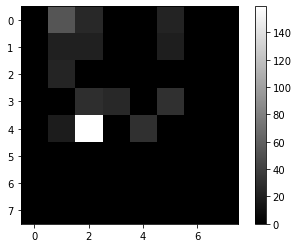

In [10]:
print('데이터 이미지화')
plt.imshow(array_feature[0] , cmap='gray')
plt.colorbar();

# 2. 데이터 전처리
## (1) 데이터 증강

In [11]:
# array_feature에 filter augmented data를 concatenate.
def filter_concat(array_feature, blur_filter = False, contour_filter = False, 
                  edge_enhance_filter = False):
    
    filteradded_array_feature = []
    
    for i, j in enumerate(array_feature):
        image = Image.fromarray(array_feature[i])
        stack_array = np.expand_dims(array_feature[i], axis = 2)
        
        if blur_filter:
            image_BLUR = image.filter(ImageFilter.BLUR)
            blur_array_feature = np.array(image_BLUR)
            blur_stack_array = np.expand_dims(blur_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, blur_stack_array), axis = 2)
            
        if contour_filter:
            image_CONTOUR = image.filter(ImageFilter.CONTOUR)
            contour_array_feature = np.array(image_CONTOUR)
            contour_stack_array = np.expand_dims(contour_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, contour_stack_array), axis = 2)
            
        if edge_enhance_filter:
            image_EDGE_ENHANCE = image.filter(ImageFilter.EDGE_ENHANCE)
            edge_enhance_array_feature = np.array(image_EDGE_ENHANCE)
            edge_enhance_stack_array = np.expand_dims(edge_enhance_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, edge_enhance_stack_array), axis = 2)
    
        filteradded_array_feature.append(stack_array)
    
    filteradded_array_feature = np.array(filteradded_array_feature)
    return filteradded_array_feature
    


In [12]:
final_feature = filter_concat(array_feature, blur_filter = blur_filter, contour_filter = contour_filter, 
                  edge_enhance_filter = edge_enhance_filter)

final_feature.shape

(900, 8, 8, 1)

## (3) 데이터 분리

In [13]:

# Train data 초반 70%, Test data 다음 15%, Validation data 마지막 15%
local_X_train = final_feature[:int(len(feature)*(1-test_size-val_size))]
local_X_test = final_feature[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
local_X_val = final_feature[int(len(feature)*(1-val_size)):]

y_train = label[:int(len(feature)*(1-test_size-val_size))]
y_test =  label[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
y_val = label[int(len(feature)*(1-val_size)):]

# local_X_train, local_X_test, y_train, y_test = train_test_split(final_feature, label, 
#                                                     test_size = tts_test_size, random_state= train_test_split_randomstate)    ## test_size를 변경하며 시험.
# Normalization
local_X_train = local_X_train / 255.0
local_X_test = local_X_test / 255.0
local_X_val = local_X_val / 255.0

# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = tf.data.Dataset.from_tensor_slices((local_X_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((local_X_test, y_test))
local_X_train.shape

(630, 8, 8, 1)

In [14]:
global_X_train = feature[:int(len(feature)*(1-test_size-val_size))]
global_X_test = feature[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
global_X_val = feature[int(len(feature)*(1-val_size)):]
global_X_train.shape

(630, 64)

# 3. 모델 학습

## (1) 모델 설계 및 대표 벡터 추출

In [15]:
# concat_VGG16

# 1st block
local_input = Input(shape = (image_size, image_size, filter_num+1), name = 'Local feature (Image) Input')
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same', name = 'block1_conv1')(local_input)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same', name = 'block1_conv2')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block1_pool')(x)

# 2nd block
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv1')(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv2')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block2_pool')(x)

# 3rd block
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv1')(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv2')(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv3')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block3_pool')(x)

# 4th block
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv1')(x)
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv2')(x)
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv3')(x)
# x = MaxPool2D((2,2), strides = (2,2), name = 'block4_pool')(x)

# 5th block
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv1')(x)
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv2')(x)
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv3')(x)
# x = MaxPool2D((2,2), strides = (2,2), name = 'block5_pool')(x)

# Local feature만 사용.
# Simpple flatten block
x = Flatten(name = 'flatten')(x)

# Final block
x = Dense(1024, activation = 'relu', name = 'fc1')(x)       # 초기값 4096
output = Dense(1024, activation = 'relu', name = 'fc2')(x)  # 초기값 4096

prediction = Dense(classes_num, activation = 'softmax', name = 'prediction')(output)    
modified_VGG16_model = Model(inputs = local_input, outputs = prediction, name = 'Simpler_VGG16_model')


modified_VGG16_model.summary()

Model: "Simpler_VGG16_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Local feature (Image) Input  [(None, 8, 8, 1)]        0         
  (InputLayer)                                                   
                                                                 
 block1_conv1 (Conv2D)       (None, 8, 8, 64)          640       
                                                                 
 block1_conv2 (Conv2D)       (None, 8, 8, 64)          36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 4, 4, 64)          0         
                                                                 
 block2_conv1 (Conv2D)       (None, 4, 4, 128)         73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 4, 4, 128)         147584    
                                               

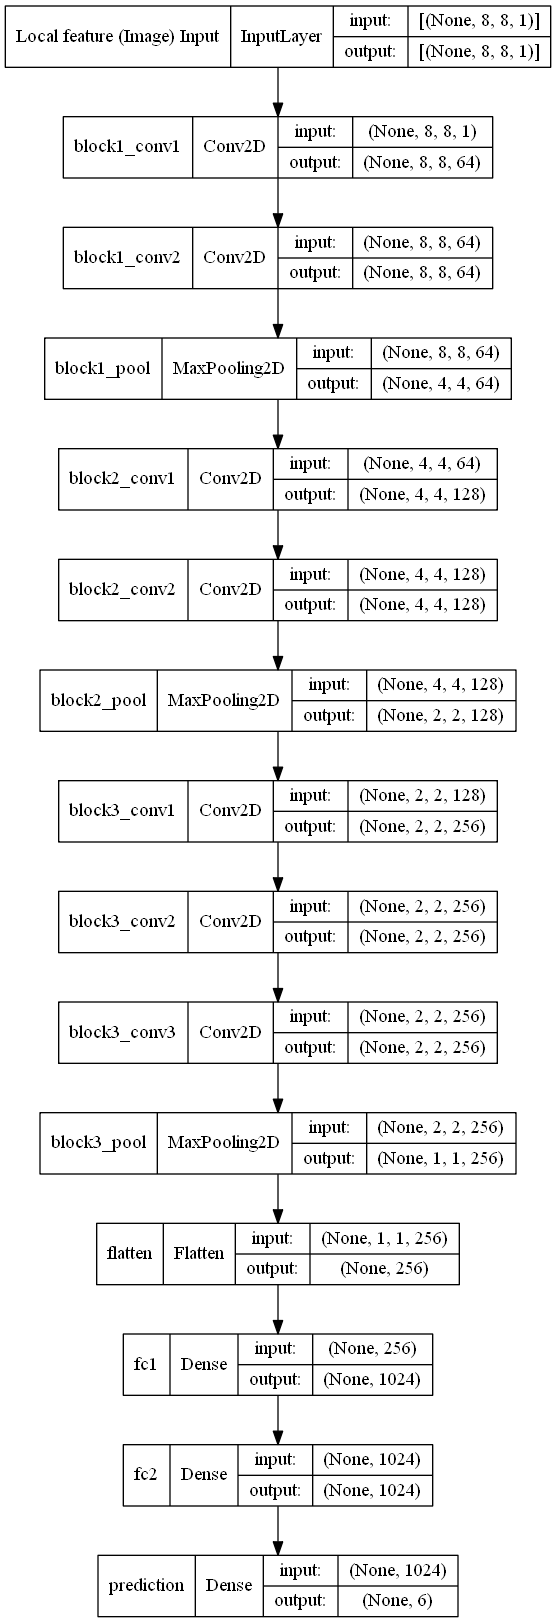

In [16]:
# 모델 도면 출력
plot_model(modified_VGG16_model, 'modified_VGG16_model.png', show_shapes = True)

In [17]:
# 모델 학습
modified_VGG16_model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

modified_VGG16_model.fit(local_X_train, y_train, epochs = epoch_num)
modified_VGG16_model.evaluate(local_X_test, y_test, verbose = 2)

Epoch 1/20
20/20 [==============================] - 2s 12ms/step - loss: 1.5454 - accuracy: 0.3095
Epoch 2/20
20/20 [==============================] - 0s 7ms/step - loss: 0.8747 - accuracy: 0.5794
Epoch 3/20
20/20 [==============================] - 0s 7ms/step - loss: 0.5253 - accuracy: 0.6635
Epoch 4/20
20/20 [==============================] - 0s 7ms/step - loss: 0.4885 - accuracy: 0.6873
Epoch 5/20
20/20 [==============================] - 0s 7ms/step - loss: 0.4470 - accuracy: 0.7222
Epoch 6/20
20/20 [==============================] - 0s 7ms/step - loss: 0.4029 - accuracy: 0.7794
Epoch 7/20
20/20 [==============================] - 0s 7ms/step - loss: 0.3256 - accuracy: 0.8730
Epoch 8/20
20/20 [==============================] - 0s 7ms/step - loss: 0.2783 - accuracy: 0.8905
Epoch 9/20
20/20 [==============================] - 0s 6ms/step - loss: 0.5336 - accuracy: 0.7619
Epoch 10/20
20/20 [==============================] - 0s 7ms/step - loss: 0.1999 - accuracy: 0.9238
Epoch 11/20
20/20 

[0.11831694841384888, 0.9555555582046509]

In [18]:
# 모델의 Feature list 확인
modified_VGG16_features_list = [layer.output for layer in modified_VGG16_model.layers]
modified_VGG16_features_list

[<KerasTensor: shape=(None, 8, 8, 1) dtype=float32 (created by layer 'Local feature (Image) Input')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 4, 4, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 2, 2, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 1, 1, 256) dtype=float32 (created by layer 'block3_pool')>,
 <KerasTensor:

In [19]:
# representation vector extraction - 전체 블록에 대해
modified_VGG16_feat_extraction_model = Model(inputs = modified_VGG16_model.input, outputs = modified_VGG16_features_list)

train_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_train)
test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_test)
val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_val)

In [20]:
# 최종 representation vector 선별 - 분류 직전 단계
train_modified_VGG16_representations = np.array(train_modified_VGG16_extracted_features[-2], dtype = object)
test_modified_VGG16_representations = np.array(test_modified_VGG16_extracted_features[-2], dtype = object)
val_modified_VGG16_representations = np.array(val_modified_VGG16_extracted_features[-2], dtype = object)

In [21]:
train_modified_VGG16_representations  # 내용물 확인

array([[0.7327038049697876, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 7.857574939727783, 0.0, ..., 0.0, 0.0, 7.48051643371582],
       [0.0, 0.834900438785553, 0.0, ..., 0.9618348479270935, 0.0,
        0.6598703861236572],
       ...,
       [0.7934886813163757, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.015409095212817192, 0.0, 0.0],
       [0.0, 0.02173009142279625, 0.0, ..., 0.4663616418838501, 0.0,
        0.049183785915374756]], dtype=object)

## (2) 분류 예측 및 예외 처리

In [22]:
# K-Neighbors 
KN_classifier = KNeighborsClassifier(n_neighbors = 3, p=2, metric = 'minkowski')
KN_classifier.fit(train_modified_VGG16_representations, y_train)

# Decision tree
DT_classifier = DecisionTreeClassifier(random_state = classifier_random_state)   ## 모델 지정
DT_classifier.fit(train_modified_VGG16_representations, y_train)


# Random forest
RF_classifier = RandomForestClassifier(random_state = classifier_random_state)   ## 모델 지정
RF_classifier.fit(train_modified_VGG16_representations, y_train)


# Support vector machine
SVM_classifier = svm.SVC(random_state = classifier_random_state, kernel = 'linear', C = 10)   ## C가 클수록 정확해짐
SVM_classifier.fit(train_modified_VGG16_representations, y_train)


# Stochastic gradient descent
SGD_classifier = SGDClassifier(random_state = classifier_random_state)   ## 모델 지정
SGD_classifier.fit(train_modified_VGG16_representations, y_train)


# Logistic regression
LR_classifier = LogisticRegression(random_state = classifier_random_state, max_iter = 5000)   ## 모델 지정
LR_classifier.fit(train_modified_VGG16_representations, y_train)

# Multinomial Naive Bayes
MNB_classifier = MultinomialNB()   ## 모델 지정
MNB_classifier.fit(train_modified_VGG16_representations, y_train)

# clf= MultinomialNB()
# clf.fit(train_simpler_VGG16_representations, y_train)
# score = clf.score(test_simpler_VGG16_representations, y_test)
# score

MultinomialNB()

In [23]:
print('*** K-Neighbors classifier result ***')
KN_y_pred = KN_classifier.predict(val_modified_VGG16_representations)
KN_report = classification_report(y_val, KN_y_pred)
print(KN_report)

print('*** Decision tree classifier result ***')
DT_y_pred = DT_classifier.predict(val_modified_VGG16_representations)
DT_report = classification_report(y_val, DT_y_pred)
print(DT_report)

print('*** Random forest classifier result ***')
RF_y_pred = RF_classifier.predict(val_modified_VGG16_representations)
RF_report = classification_report(y_val, RF_y_pred)
print(RF_report)

print('*** Support vector machine classifier result ***')
SVM_y_pred = SVM_classifier.predict(val_modified_VGG16_representations)
SVM_report = classification_report(y_val, SVM_y_pred)
print(SVM_report)

print('*** Stochastic gradient descent classifier result ***')
SGD_y_pred = SGD_classifier.predict(val_modified_VGG16_representations)
SGD_report = classification_report(y_val, SGD_y_pred)
print(SGD_report)

print('*** Logistic regression classifier result ***')
LR_y_pred = LR_classifier.predict(val_modified_VGG16_representations)
LR_report = classification_report(y_val, LR_y_pred)
print(LR_report)

print('*** Multinomial Naive Bayes classifier result ***')
MNB_y_pred = MNB_classifier.predict(val_modified_VGG16_representations)
MNB_report = classification_report(y_val, LR_y_pred)
print(MNB_report)


*** K-Neighbors classifier result ***
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        18
           5       1.00      0.97      0.98        29

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135

*** Decision tree classifier result ***
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        18
           5       1.00      0.90      0.95        29


## (3) 결과 시각화
### Confusion matrix

<AxesSubplot:>

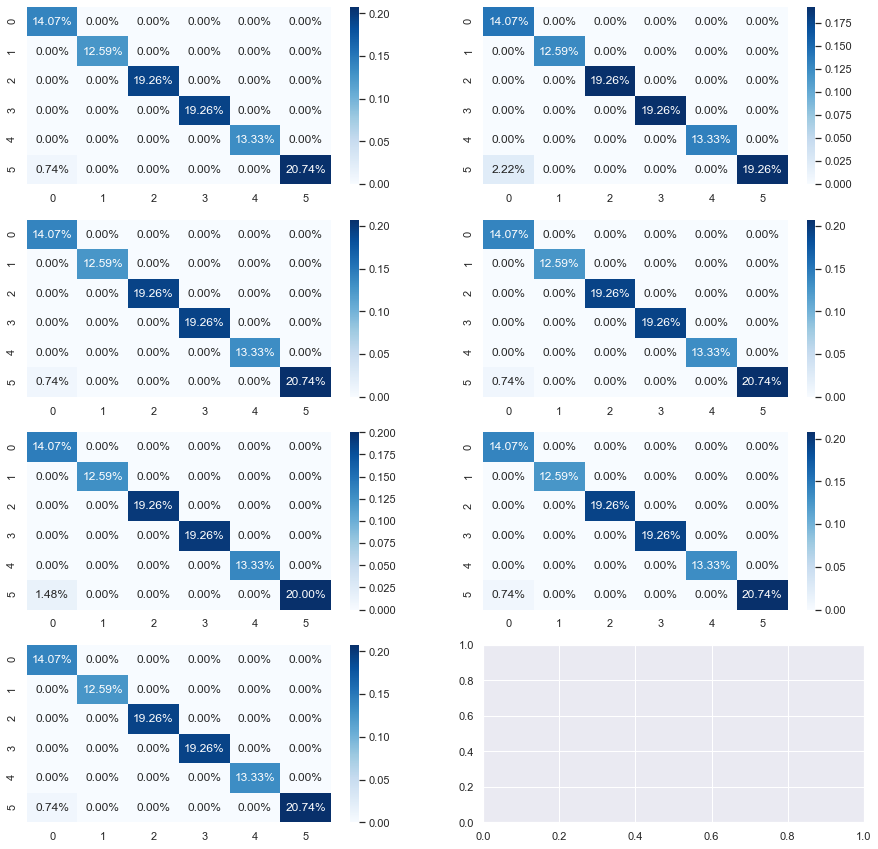

In [24]:
# Confusion matrix 계산 및 히트맵 시각화

KN_cm = confusion_matrix(y_val, KN_y_pred)
DT_cm = confusion_matrix(y_val, DT_y_pred)
RF_cm = confusion_matrix(y_val, RF_y_pred)
SVM_cm = confusion_matrix(y_val, SVM_y_pred)
SGD_cm = confusion_matrix(y_val, SGD_y_pred)
LR_cm = confusion_matrix(y_val, LR_y_pred)
MNB_cm = confusion_matrix(y_val, MNB_y_pred)



sns.set(rc = {'figure.figsize':(15,15)})
fig, axes = plt.subplots(nrows = 4, ncols = 2)
sns.heatmap(KN_cm/np.sum(KN_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[0,0])
sns.heatmap(DT_cm/np.sum(DT_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[0,1])
sns.heatmap(RF_cm/np.sum(RF_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[1,0])
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[1,1])
sns.heatmap(SGD_cm/np.sum(SGD_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[2,0])
sns.heatmap(LR_cm/np.sum(LR_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[2,1])
sns.heatmap(MNB_cm/np.sum(MNB_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[3,0])
    

### TSNE

In [25]:
# representation 벡터 형태 변환
train_df = pd.DataFrame(train_modified_VGG16_representations)

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

df_y = np.array(y_train)
df_y = pd.DataFrame(df_y)
tsne_df['target'] = pd.DataFrame(df_y)

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]
tsne_df_3 = tsne_df[tsne_df['target'] == 3]
tsne_df_4 = tsne_df[tsne_df['target'] == 4]
tsne_df_5 = tsne_df[tsne_df['target'] == 5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


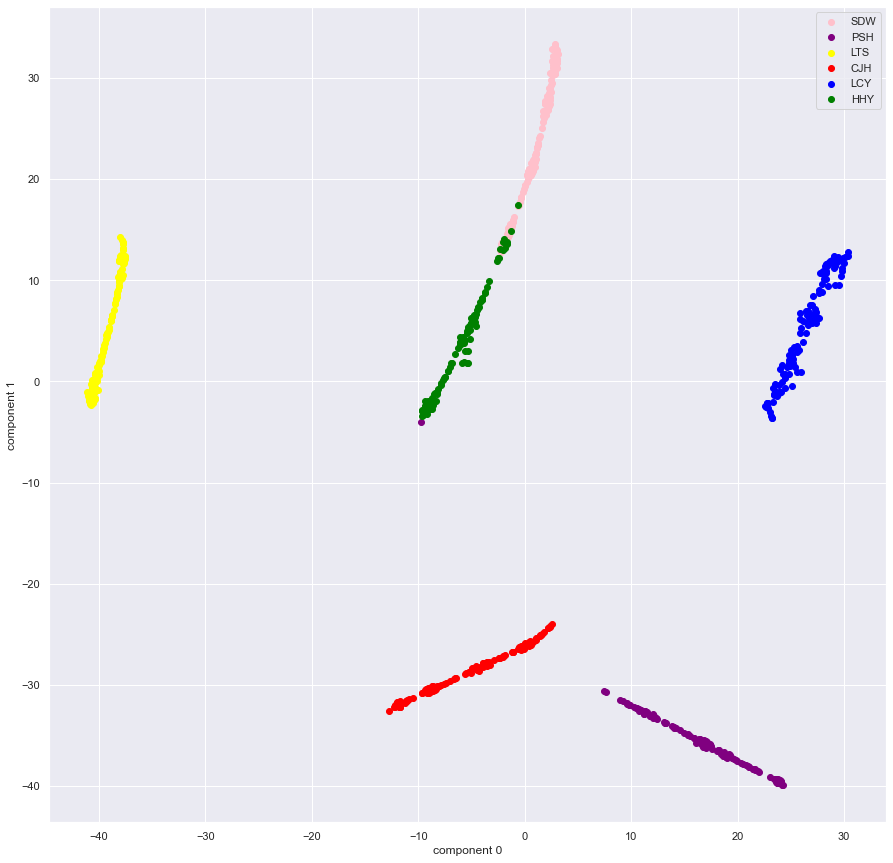

<Figure size 1080x1080 with 0 Axes>

In [26]:
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'SDW')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'PSH')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'LTS')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'red', label = 'CJH')
plt.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'], color = 'blue', label = 'LCY')
plt.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'], color = 'green', label = 'HHY')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()
plt.savefig('tsne_sample.png')